In [98]:
# import libraries
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aldol07/socioeconomic-factors-and-income-dataset")

print("Path to dataset files:", path)


Path to dataset files: /Users/jackgedge/.cache/kagglehub/datasets/aldol07/socioeconomic-factors-and-income-dataset/versions/1


In [99]:
# Import other libraries
import pandas as pd
import seaborn as sns
import os
from pathlib import Path
from matplotlib import pyplot as plt

In [100]:
# Read files in path
csv_files = [str(file) for file in Path(path).rglob('*.csv')]
df = pd.read_csv(csv_files[0])

In [101]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   int64 
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB


In [102]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,single,67,university,124670,skilled employee / official,2
1,100000002,1,non-single (divorced / separated / married / w...,22,high school,150773,skilled employee / official,2
2,100000003,0,single,49,high school,89210,unemployed / unskilled,0
3,100000004,0,single,45,high school,171565,skilled employee / official,1
4,100000005,0,single,53,high school,149031,skilled employee / official,1


In [103]:
# check IDs are unique
df['ID'].nunique() == len(df['ID'])

True

In [104]:
# Show unique values in Sex column
df['Sex'].unique()

array([0, 1])

In [ ]:
# Cast Sex to type string
df['Sex'] = df['Sex'].astype(str)

# Create gender map
gender_map = {
    '0': 'Female',
    '1': 'Male'
}

# Map gender to Sex column
df['Sex'] = df['Sex'].map(gender_map)

df['Sex'] = df['Sex'].astype('category') # Set as categorical variable

df['Sex'].value_counts()

Sex
Female    1086
Male       914
Name: count, dtype: int64

[Text(0.5, 1.0, 'Gender Counts (n=2000)')]

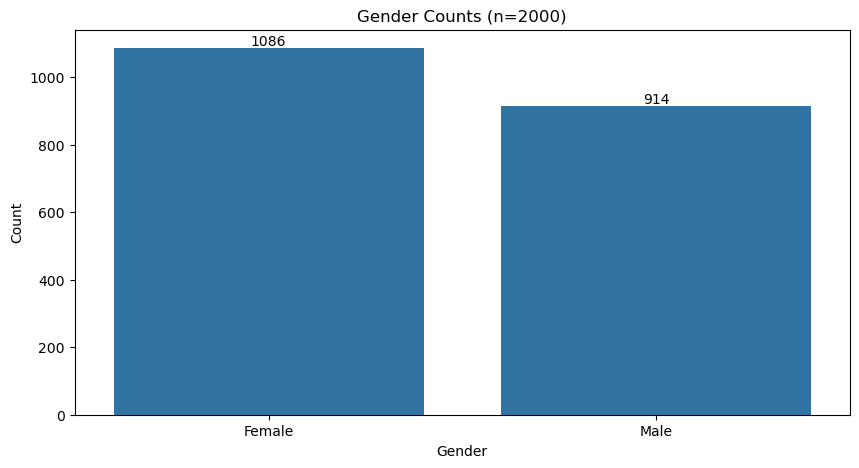

In [116]:
plot_data = df['Sex'].value_counts().reset_index()
plot_data.columns = ['Gender', 'Count']

plt.figure(figsize=(10,5)) # figure
ax = sns.barplot(data=plot_data,
                 x='Gender',
                 y='Count')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')
ax.set(title=f"Gender Counts (n={len(df)})")

In [106]:
df['Marital status'] = df['Marital status'].astype(str).str.strip().str.title() # cast to string variable
df['Marital status'].unique() # identify unique values

array(['Single', 'Non-Single (Divorced / Separated / Married / Widowed)'],
      dtype=object)

In [107]:
df['Marital status'] = df['Marital status'].astype('category') # cast as categorical variable

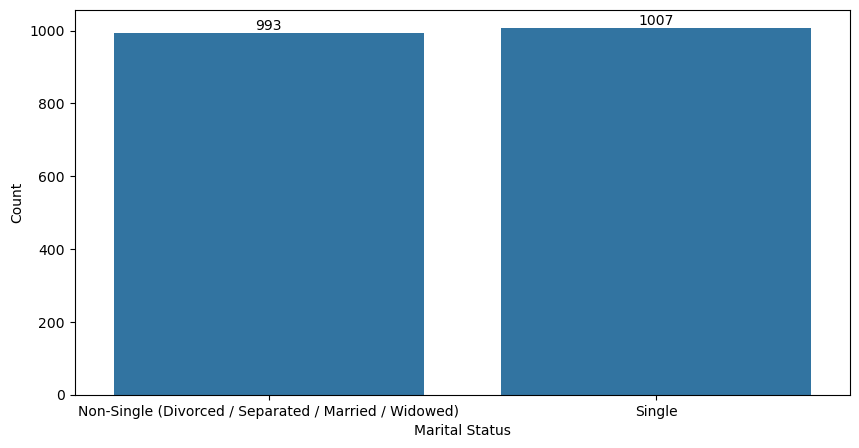

In [ ]:
plot_data = df['Marital status'].value_counts().reset_index()
plot_data.columns = ['Marital Status', 'Count']
# plot data as bar
plt.figure(figsize=(10,5))
ax = sns.barplot(data=plot_data,
                 x='Marital Status',
                 y='Count')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", # get label
                (p.get_x() + p.get_width() / 2., p.get_height()), # position
                ha='center', va='bottom') # alignment
plt.show()

In [117]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Female,Single,67,university,124670,skilled employee / official,2
1,100000002,Male,Non-Single (Divorced / Separated / Married / W...,22,high school,150773,skilled employee / official,2
2,100000003,Female,Single,49,high school,89210,unemployed / unskilled,0
3,100000004,Female,Single,45,high school,171565,skilled employee / official,1
4,100000005,Female,Single,53,high school,149031,skilled employee / official,1


In [119]:
df['Age'] = df['Age'].apply(pd.to_numeric, errors='coerce')
df['Age'].describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

[Text(0.5, 1.0, 'Age Distribution KDE Plot (n=2000)')]

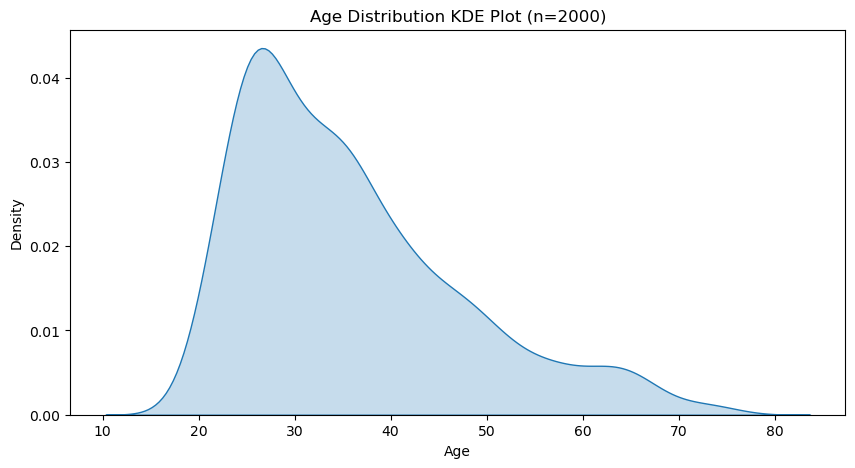

In [124]:
plot_data = df['Age']
plt.figure(figsize=(10,5))
ax = sns.kdeplot(data=plot_data, 
                 fill=True)
ax.set(title=f"Age Distribution KDE Plot (n={len(df)})")